### 서울시 상위 10개 구별 카페 수와 평균 직업수 비교

In [59]:
# 라이브러리 불러오기

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [60]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# 데이터 불러오기

food = pd.read_csv('seoul_foodplaces.csv', encoding='cp949', low_memory=False)

In [47]:
print(food.columns.tolist())  # 컬럼 이름 전체 출력

['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)', '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47']


In [48]:
print(food.head())  # 상위 5개 데이터 확인

   번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호       인허가일자  \
0   1  휴게음식점  07_24_05_P   3490000  3490000-104-2024-00154  2024-12-02   
1   2  휴게음식점  07_24_05_P   3170000  3170000-104-2025-00001  2025-01-06   
2   3  휴게음식점  07_24_05_P   3410000  3410000-104-2025-00021  2025-01-21   
3   4  휴게음식점  07_24_05_P   4040000  4040000-104-2025-00011  2025-01-21   
4   5  휴게음식점  07_24_05_P   4040000  4040000-104-2025-00010  2025-01-21   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장생산직직원수 건물소유구분명  보증액  월세액  \
0      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
1      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
2      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
3      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
4      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   

   다중이용업소여부  시설총규모  전통업소지정번호 전통업소주된음식 홈페이지 Unnamed: 47  
0         N   0.00       NaN      NaN  NaN         NaN  
1       

In [49]:
print(food.info())  # 데이터 타입, 결측치 등 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602907 entries, 0 to 602906
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   번호               602907 non-null  int64  
 1   개방서비스명           602907 non-null  object 
 2   개방서비스아이디         602907 non-null  object 
 3   개방자치단체코드         602907 non-null  int64  
 4   관리번호             602907 non-null  object 
 5   인허가일자            602888 non-null  object 
 6   인허가취소일자          0 non-null       float64
 7   영업상태구분코드         602907 non-null  int64  
 8   영업상태명            602907 non-null  object 
 9   상세영업상태코드         602907 non-null  int64  
 10  상세영업상태명          602907 non-null  object 
 11  폐업일자             402497 non-null  object 
 12  휴업시작일자           0 non-null       float64
 13  휴업종료일자           0 non-null       float64
 14  재개업일자            0 non-null       float64
 15  소재지전화            250307 non-null  object 
 16  소재지면적            553700 non-null  floa

In [66]:
# 주소, 업태구분명 컬럼 중심으로 10개 보기

print(food[['소재지전체주소', '업태구분명']].head(10))

                             소재지전체주소     업태구분명
0   인천광역시 중구 운서동 2874 파라다이스시티 플라자 1층  기타 휴게음식점
1                서울특별시 금천구 가산동 345-2       커피숍
2     대구광역시 중구 계산동2가 0200 현대백화점 지하1층  기타 휴게음식점
3            경기도 하남시 신장동 616 스타필드 하남  기타 휴게음식점
4            경기도 하남시 신장동 616 스타필드 하남  기타 휴게음식점
5            경상남도 거제시 연초면 연사리 325-30       편의점
6          경기도 화성시 오산동 1089 동탄역 롯데캐슬  기타 휴게음식점
7         서울특별시 강남구 압구정동 429 현대백화점본점  기타 휴게음식점
8         서울특별시 강남구 압구정동 429 현대백화점본점       백화점
9  충청북도 청주시 흥덕구 가경동 1696 홈플러스 청주점 1층  기타 휴게음식점


In [67]:
# 서울시 데이터만 필터링하기
# 주소 문자열에 '서울특별시'가 포함된 행만 남김
seoul_food = food[food['소재지전체주소'].str.contains('서울특별시', na=False)]

In [68]:
# 서울시 데이터에서 '구' 추출
seoul_food['구'] = seoul_food['소재지전체주소'].str.split().str[1]

C:\Users\YUNJI\AppData\Local\Temp\ipykernel_264\2793260957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_food['구'] = seoul_food['소재지전체주소'].str.split().str[1]


In [70]:
# 업태구분명에 '카페' 포함된 데이터만 필터링 (대소문자 구분 없이)
seoul_cafes = seoul_food[seoul_food['업태구분명'].str.contains('카페', case=False, na=False)]

In [71]:
# '구'별 카페 수 집계
cafe_counts = seoul_cafes['구'].value_counts()

In [72]:
# 상위 10개 구 선택
top10_cafes = cafe_counts.head(10)

In [73]:
# 결과 출력
print("서울시 상위 10개 구별 카페 수:")
print(top10_cafes)

서울시 상위 10개 구별 카페 수:
구
강남구     49
강서구     37
중구      35
강동구     33
서초구     29
양천구     25
송파구     24
노원구     22
영등포구    22
구로구     22
Name: count, dtype: int64


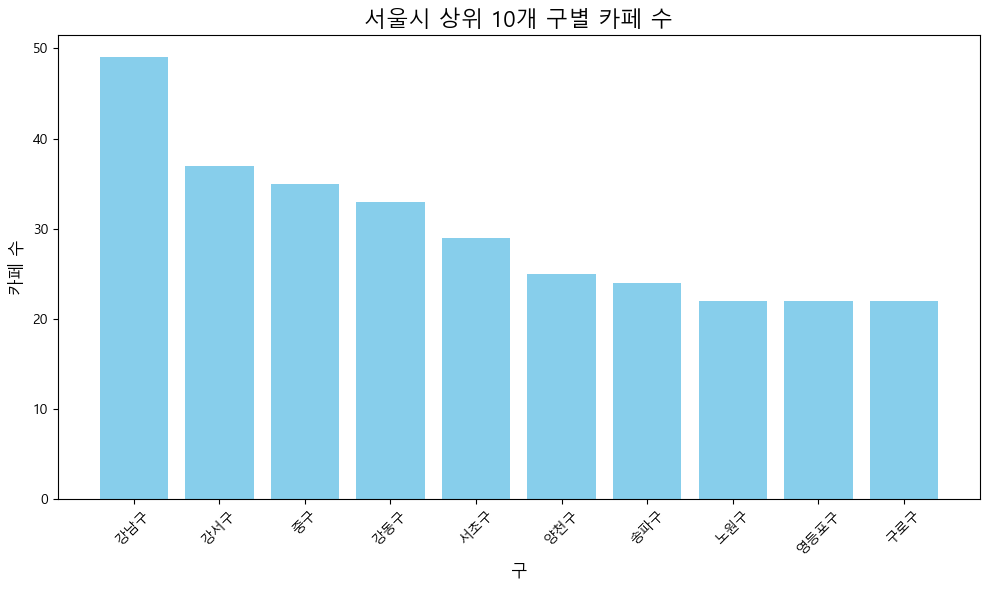

In [74]:
# 상위 10개 구 막대그래프 시각화
plt.figure(figsize=(10,6))
plt.bar(top10_cafes.index, top10_cafes.values, color='skyblue')
plt.title('서울시 상위 10개 구별 카페 수', fontsize=16)
plt.xlabel('구', fontsize=12)
plt.ylabel('카페 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# '구'별 총직원수 평균 계산 (직원 규모 파악용)
avg_staff = seoul_cafes.groupby('구')['총직원수'].mean()

In [89]:
# 상위 10개 구 중에서 평균 직원수만 추출
avg_staff_top10 = avg_staff.loc[top10_cafes.index]

C:\Users\YUNJI\AppData\Local\Temp\ipykernel_264\115311450.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


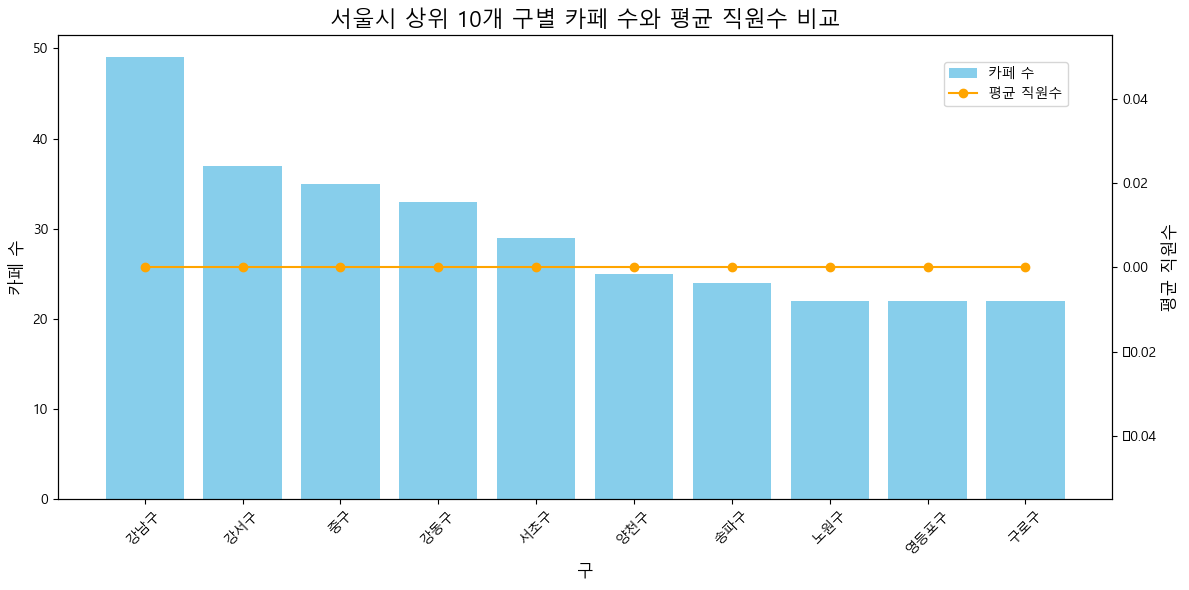

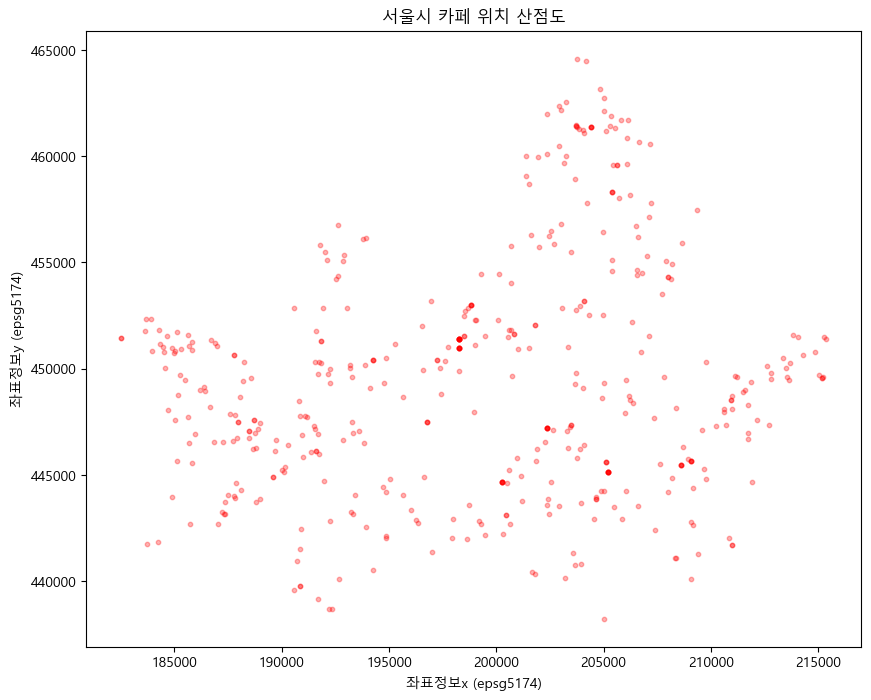

In [94]:
# 카페 수와 평균 직원수 함께 시각화 (막대그래프 + 선그래프 복합)
fig, ax1 = plt.subplots(figsize=(12,6))

# 막대그래프: 카페 수
ax1.bar(top10_cafes.index, top10_cafes.values, color='skyblue', label='카페 수')
ax1.set_xlabel('구', fontsize=12)
ax1.set_ylabel('카페 수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 두 번째 y축: 평균 직원수
ax2 = ax1.twinx()
ax2.plot(avg_staff_top10.index, avg_staff_top10.values, color='orange', marker='o', label='평균 직원수')
ax2.set_ylabel('평균 직원수', fontsize=12)

# 제목과 범례 설정
plt.title('서울시 상위 10개 구별 카페 수와 평균 직원수 비교', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout()
plt.show()

# 좌표 정보를 활용한 서울시 카페 위치 산점도 그리기
plt.figure(figsize=(10,8))
plt.scatter(seoul_cafes['좌표정보x(epsg5174)'], seoul_cafes['좌표정보y(epsg5174)'], alpha=0.3, s=10, c='red')
plt.title('서울시 카페 위치 산점도')
plt.xlabel('좌표정보x (epsg5174)')
plt.ylabel('좌표정보y (epsg5174)')
plt.show()